In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
psi_error_dict = np.load('../POD/Psi_LSTM_ROM/notebooks/Psi_ROM_32_error.npy',allow_pickle=True).item()
psi_error = psi_error_dict['Psi_error']
psi_q_error = psi_error_dict['q_error']

xi_error_dict = np.load('../FFNN/Xi_LSTM_ROM/notebooks/Xi_ROM_32_error.npy',allow_pickle=True).item()
xi_error = xi_error_dict['Xi_error']
xi_q_error = xi_error_dict['q_error']

P_error_dict = np.load('../P_LSTM_ROM/notebooks/P_ROM_error.npy',allow_pickle=True).item()
P_error = P_error_dict['P_error']
P_q_error = P_error_dict['q_error']

n_steps = 350
t = 0.03*np.arange(n_steps+1)

In [3]:
psi_mse = np.linalg.norm(psi_error,axis=2)**2 / psi_error.shape[2]
xi_mse = np.linalg.norm(xi_error,axis=2)**2 / xi_error.shape[2]
P_mse = np.linalg.norm(P_error,axis=2)**2 / P_error.shape[2]

psi_mse_batch = np.linalg.norm(psi_error,axis=0)**2 / psi_error.shape[0]
xi_mse_batch = np.linalg.norm(xi_error,axis=0)**2 / xi_error.shape[0]
P_mse_batch = np.linalg.norm(P_error,axis=0)**2 / P_error.shape[0]

<ipython-input-4-926f6545e2d5>:12: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm=matplotlib.colors.SymLogNorm(linthresh=0.01, linscale=1,
<ipython-input-4-926f6545e2d5>:31: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm=matplotlib.colors.SymLogNorm(linthresh=0.01, linscale=1,
<ipython-input-4-926f6545e2d5>:49: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm=matplotlib.colors.SymLogNorm(linthresh=0.01, linscale=1,
<ipython-input-4-926f6545e2d5>:67: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm=matplotlib.colors.SymLogNorm(linthresh=0.01, linscale=1,
<ipython-input-4-926f6545e2d5>:84: Matplotli

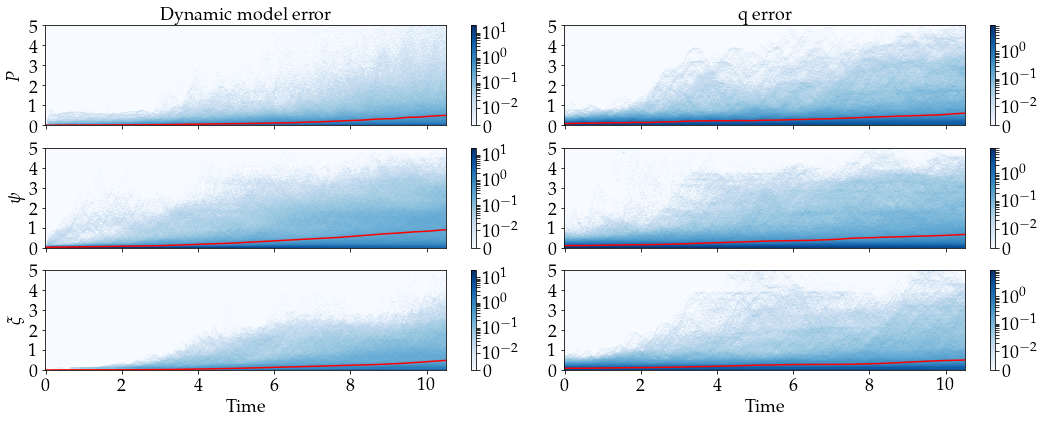

In [4]:
figure(figsize = (15,6))
label_fs = 18
mean_color = 'r'

##########################################################################################################

subplot2grid((3,2), (0,0), rowspan=1, colspan=1)
nbins = 100
x = np.linspace(0,5,nbins); dx = x[1]-x[0]
error_hist = np.stack([np.histogram(P_mse[:,i],bins=x,density=True)[0] for i in range(n_steps+1)],axis=1)
pcolor(t,(x[1:]+x[:-1])/2, error_hist, shading='auto', cmap='Blues',  
       norm=matplotlib.colors.SymLogNorm(linthresh=0.01, linscale=1,
                                         vmin=0, vmax=np.max(error_hist)))
plot(t, np.mean(P_mse,axis=0), color=mean_color)

cbar = colorbar()
cbar.ax.tick_params(labelsize=label_fs)

yticks(fontsize = label_fs)
xticks(fontsize = 0)
ylabel(r'$P$',fontsize = label_fs)
title(r'Dynamic model error',fontsize = label_fs)

##########################################################################################################

subplot2grid((3,2), (0,1), rowspan=1, colspan=1)
nbins = 100
x = np.linspace(0,5,nbins); dx = x[1]-x[0]
error_hist = np.stack([np.histogram(np.abs(P_q_error[:,i]),bins=x,density=True)[0] for i in range(n_steps+1)],axis=1)
pcolor(t,(x[1:]+x[:-1])/2, error_hist, shading='auto', cmap='Blues',  
       norm=matplotlib.colors.SymLogNorm(linthresh=0.01, linscale=1,
                                         vmin=0, vmax=np.max(error_hist)))
plot(t, np.mean(np.abs(P_q_error),axis=0), color=mean_color)

cbar = colorbar()
cbar.ax.tick_params(labelsize=label_fs)

yticks(fontsize = label_fs)
xticks(fontsize = 0)
title(r'q error',fontsize = label_fs)

##########################################################################################################

subplot2grid((3,2), (1,0), rowspan=1, colspan=1)
nbins = 100
x = np.linspace(0,5,nbins); dx = x[1]-x[0]
error_hist = np.stack([np.histogram(psi_mse[:,i],bins=x,density=True)[0] for i in range(n_steps+1)],axis=1)
pcolor(t,(x[1:]+x[:-1])/2, error_hist, shading='auto', cmap='Blues',  
       norm=matplotlib.colors.SymLogNorm(linthresh=0.01, linscale=1,
                                         vmin=0, vmax=np.max(error_hist)))
plot(t, np.mean(psi_mse,axis=0), color=mean_color)

cbar = colorbar()
cbar.ax.tick_params(labelsize=label_fs)

yticks(fontsize = label_fs)
xticks(fontsize = 0)
ylabel(r'$\psi$',fontsize = label_fs)

##########################################################################################################

subplot2grid((3,2), (1,1), rowspan=1, colspan=1)
nbins = 100
x = np.linspace(0,5,nbins); dx = x[1]-x[0]
error_hist = np.stack([np.histogram(np.abs(psi_q_error[:,i]),bins=x,density=True)[0] for i in range(n_steps+1)],axis=1)
pcolor(t,(x[1:]+x[:-1])/2, error_hist, shading='auto', cmap='Blues',  
       norm=matplotlib.colors.SymLogNorm(linthresh=0.01, linscale=1,
                                         vmin=0, vmax=np.max(error_hist)))
plot(t, np.mean(np.abs(psi_q_error),axis=0), color=mean_color)

cbar = colorbar()
cbar.ax.tick_params(labelsize=label_fs)

yticks(fontsize = label_fs)
xticks(fontsize = 0)

##########################################################################################################

subplot2grid((3,2), (2,0), rowspan=1, colspan=1)
nbins = 100
x = np.linspace(0,5,nbins); dx = x[1]-x[0]
error_hist = np.stack([np.histogram(xi_mse[:,i],bins=x,density=True)[0] for i in range(n_steps+1)],axis=1)
pcolor(t,(x[1:]+x[:-1])/2, error_hist, shading='auto', cmap='Blues',  
       norm=matplotlib.colors.SymLogNorm(linthresh=0.01, linscale=1,
                                         vmin=0, vmax=np.max(error_hist)))
plot(t, np.mean(xi_mse,axis=0), color=mean_color)

cbar = colorbar()
cbar.ax.tick_params(labelsize=label_fs)

yticks(fontsize = label_fs)
xticks(fontsize = label_fs)
xlabel('Time',fontsize = label_fs)
ylabel(r'$\xi$',fontsize = label_fs)

##########################################################################################################

subplot2grid((3,2), (2,1), rowspan=1, colspan=1)
nbins = 100
x = np.linspace(0,5,nbins); dx = x[1]-x[0]
error_hist = np.stack([np.histogram(np.abs(xi_q_error[:,i]),bins=x,density=True)[0] for i in range(n_steps+1)],axis=1)
pcolor(t,(x[1:]+x[:-1])/2, error_hist, shading='auto', cmap='Blues',  
       norm=matplotlib.colors.SymLogNorm(linthresh=0.01, linscale=1,
                                         vmin=0, vmax=np.max(error_hist)))
plot(t, np.mean(np.abs(xi_q_error),axis=0), color=mean_color)

cbar = colorbar()
cbar.ax.tick_params(labelsize=label_fs)

yticks(fontsize = label_fs)
xticks(fontsize = label_fs)
xlabel('Time',fontsize = label_fs)

##########################################################################################################

tight_layout()

<ipython-input-5-b1865b7efa44>:8: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm=matplotlib.colors.SymLogNorm(linthresh=0.01, linscale=1,
<ipython-input-5-b1865b7efa44>:22: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm=matplotlib.colors.SymLogNorm(linthresh=0.01, linscale=1,
<ipython-input-5-b1865b7efa44>:36: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  norm=matplotlib.colors.SymLogNorm(linthresh=0.01, linscale=1,


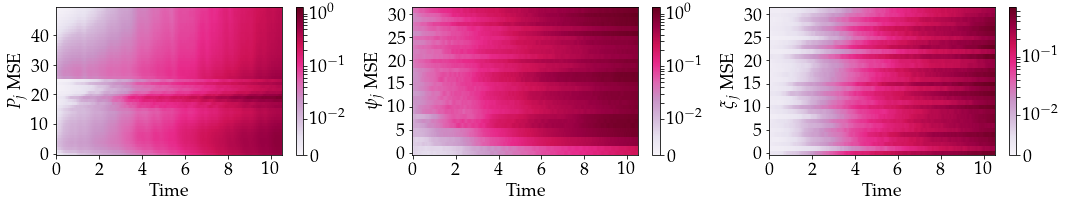

In [5]:
figure(figsize = (15,3))
label_fs = 18 

##########################################################################################################

subplot2grid((1,3), (0,0), rowspan=1, colspan=1)
pcolor(t,np.arange(50), P_mse_batch.T, shading='auto', cmap='PuRd',  
       norm=matplotlib.colors.SymLogNorm(linthresh=0.01, linscale=1,
                                         vmin=0, vmax=np.max(psi_mse_batch)))
cbar = colorbar()
cbar.ax.tick_params(labelsize=label_fs)

yticks(fontsize = label_fs)
xticks(fontsize = label_fs)
xlabel('Time',fontsize = label_fs)
ylabel(r'$P_j$ MSE',fontsize = label_fs)

##########################################################################################################

subplot2grid((1,3), (0,1), rowspan=1, colspan=1)
pcolor(t,np.arange(32), psi_mse_batch.T, shading='auto', cmap='PuRd',  
       norm=matplotlib.colors.SymLogNorm(linthresh=0.01, linscale=1,
                                         vmin=0, vmax=np.max(psi_mse_batch)))
cbar = colorbar()
cbar.ax.tick_params(labelsize=label_fs)

yticks(fontsize = label_fs)
xticks(fontsize = label_fs)
xlabel('Time',fontsize = label_fs)
ylabel(r'$\psi_j$ MSE',fontsize = label_fs)

##########################################################################################################

subplot2grid((1,3), (0,2), rowspan=1, colspan=1)
pcolor(t,np.arange(32), xi_mse_batch.T, shading='auto', cmap='PuRd',  
       norm=matplotlib.colors.SymLogNorm(linthresh=0.01, linscale=1,
                                         vmin=0, vmax=np.max(xi_mse_batch)))
cbar = colorbar()
cbar.ax.tick_params(labelsize=label_fs)

yticks(fontsize = label_fs)
xticks(fontsize = label_fs)
xlabel('Time',fontsize = label_fs)
ylabel(r'$\xi_j$ MSE',fontsize = label_fs)

tight_layout()